In [31]:
import pandas as pd
import seaborn as sns

In [32]:
#trata sobre predecir los clientes que pueden incumplir los pagos en 2 años.

#la metrica va a ser AUC

#lo que significa da una de las columnas es lo siguiente
#Revolving Utilization of Unsecured Lines (RUUL) -- Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits.
#DebtRatio -- Monthly debt payments, alimony,living costs divided by monthy gross income
#NumberOfOpenCreditLinesAndLoans
#NumberOfTime30-59DaysPastDueNotWorse
#MonthlyIncome
#NumberOfTimes90DaysLate
#NumberRealEstateLoansOrLines
#NumberOfTime60-89DaysPastDueNotWorse
#NumberOfDependents
#age

In [33]:
credit=pd.read_csv("D:\\Bootcamp\\competencia1\\Competencia2\\train.csv", sep=",")
credit


,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,44164,0,0.768219,68y,1,0.687930,2178.0,12,0,1,0,0.0
1,95356,0,0.289873,52y,0,0.385497,3750.0,16,0,1,0,1.0
2,108917,0,0.000000,54y,0,0.346503,6833.0,8,0,1,0,0.0
3,99039,0,0.046064,66y,1,0.407614,5200.0,6,0,1,0,1.0
4,116168,0,0.168771,45y,0,4702.000000,NaN,10,0,3,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
73358,25055,0,0.010468,45y,0,0.211663,12500.0,15,0,1,0,3.0
73359,105554,0,0.131250,42y,0,0.311538,5000.0,9,0,0,0,0.0
73360,129050,0,0.550527,59y,0,2777.000000,NaN,12,0,1,0,0.0
73361,94633,0,0.678651,31y,0,0.436990,3800.0,12,0,1,0,0.0


In [34]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73363 entries, 0 to 73362
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    73363 non-null  int64  
 1   target                                73363 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  73363 non-null  float64
 3   age                                   73363 non-null  object 
 4   NumberOfTime30-59DaysPastDueNotWorse  73363 non-null  int64  
 5   DebtRatio                             73363 non-null  float64
 6   MonthlyIncome                         58796 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       73363 non-null  int64  
 8   NumberOfTimes90DaysLate               73363 non-null  int64  
 9   NumberRealEstateLoansOrLines          73363 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  73363 non-null  int64  
 11  NumberOfDepende

In [35]:
credit["age"]=credit["age"].str.replace("y","")
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73363 entries, 0 to 73362
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    73363 non-null  int64  
 1   target                                73363 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  73363 non-null  float64
 3   age                                   73363 non-null  object 
 4   NumberOfTime30-59DaysPastDueNotWorse  73363 non-null  int64  
 5   DebtRatio                             73363 non-null  float64
 6   MonthlyIncome                         58796 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       73363 non-null  int64  
 8   NumberOfTimes90DaysLate               73363 non-null  int64  
 9   NumberRealEstateLoansOrLines          73363 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  73363 non-null  int64  
 11  NumberOfDepende

In [36]:
credit["age"]=credit["age"].astype(int)
credit

,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,44164,0,0.768219,68,1,0.687930,2178.0,12,0,1,0,0.0
1,95356,0,0.289873,52,0,0.385497,3750.0,16,0,1,0,1.0
2,108917,0,0.000000,54,0,0.346503,6833.0,8,0,1,0,0.0
3,99039,0,0.046064,66,1,0.407614,5200.0,6,0,1,0,1.0
4,116168,0,0.168771,45,0,4702.000000,NaN,10,0,3,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
73358,25055,0,0.010468,45,0,0.211663,12500.0,15,0,1,0,3.0
73359,105554,0,0.131250,42,0,0.311538,5000.0,9,0,0,0,0.0
73360,129050,0,0.550527,59,0,2777.000000,NaN,12,0,1,0,0.0
73361,94633,0,0.678651,31,0,0.436990,3800.0,12,0,1,0,0.0


In [37]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73363 entries, 0 to 73362
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    73363 non-null  int64  
 1   target                                73363 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  73363 non-null  float64
 3   age                                   73363 non-null  int32  
 4   NumberOfTime30-59DaysPastDueNotWorse  73363 non-null  int64  
 5   DebtRatio                             73363 non-null  float64
 6   MonthlyIncome                         58796 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       73363 non-null  int64  
 8   NumberOfTimes90DaysLate               73363 non-null  int64  
 9   NumberRealEstateLoansOrLines          73363 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  73363 non-null  int64  
 11  NumberOfDepende

In [38]:

credit = credit.rename(columns={"RevolvingUtilizationOfUnsecuredLines": "Ruul"})
credit=credit.rename(columns={"NumberOfTime30-59DaysPastDueNotWorse":"Imp3059"})
credit=credit.rename(columns={"NumberOfOpenCreditLinesAndLoans":"Creditlines"})
credit=credit.rename(columns={"NumberOfTimes90DaysLate":"Times90D", "NumberRealEstateLoansOrLines":"Numloanslines", "NumberOfTime60-89DaysPastDueNotWorse":"Times6089","NumberOfDependents":"Dependents"})
credit

,Id,target,Ruul,age,Imp3059,DebtRatio,MonthlyIncome,Creditlines,Times90D,Numloanslines,Times6089,Dependents
0,44164,0,0.768219,68,1,0.687930,2178.0,12,0,1,0,0.0
1,95356,0,0.289873,52,0,0.385497,3750.0,16,0,1,0,1.0
2,108917,0,0.000000,54,0,0.346503,6833.0,8,0,1,0,0.0
3,99039,0,0.046064,66,1,0.407614,5200.0,6,0,1,0,1.0
4,116168,0,0.168771,45,0,4702.000000,NaN,10,0,3,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
73358,25055,0,0.010468,45,0,0.211663,12500.0,15,0,1,0,3.0
73359,105554,0,0.131250,42,0,0.311538,5000.0,9,0,0,0,0.0
73360,129050,0,0.550527,59,0,2777.000000,NaN,12,0,1,0,0.0
73361,94633,0,0.678651,31,0,0.436990,3800.0,12,0,1,0,0.0


In [39]:
credit.describe()

,Id,target,Ruul,age,Imp3059,DebtRatio,MonthlyIncome,Creditlines,Times90D,Numloanslines,Times6089,Dependents
count,73363.000000,73363.000000,73363.000000,73363.000000,73363.000000,73363.000000,5.879600e+04,73363.000000,73363.000000,73363.000000,73363.000000,71421.000000
mean,75035.459564,0.065919,5.884904,52.362908,0.410507,359.752537,6.649145e+03,8.443916,0.256546,1.019928,0.231847,0.755506
std,43303.736606,0.248142,235.508449,14.781089,4.090014,2477.648064,1.046163e+04,5.142232,4.066573,1.136357,4.052280,1.111715
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37449.000000,0.000000,0.029752,41.000000,0.000000,0.173446,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75032.000000,0.000000,0.154688,52.000000,0.000000,0.365737,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112628.500000,0.000000,0.558686,63.000000,0.000000,0.863514,8.300000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,149998.000000,1.000000,29110.000000,105.000000,98.000000,329664.000000,1.560100e+06,57.000000,98.000000,32.000000,98.000000,13.000000


In [40]:
credit.corr()

,Id,target,Ruul,age,Imp3059,DebtRatio,MonthlyIncome,Creditlines,Times90D,Numloanslines,Times6089,Dependents
Id,1.000000,0.002627,0.001149,0.002608,0.003466,-0.001767,0.003733,0.005652,0.002008,0.003922,0.002615,0.003689
target,0.002627,1.000000,-0.000057,-0.113796,0.118269,-0.007099,-0.026549,-0.025422,0.110286,-0.001227,0.094685,0.042542
Ruul,0.001149,-0.000057,1.000000,-0.006383,-0.001310,0.004486,0.004302,-0.010799,-0.000813,0.003690,-0.001055,0.002327
age,0.002608,-0.113796,-0.006383,1.000000,-0.062719,0.022131,0.046076,0.143650,-0.061021,0.029454,-0.057201,-0.216902
Imp3059,0.003466,0.118269,-0.001310,-0.062719,1.000000,-0.005599,-0.012733,-0.052267,0.982972,-0.027552,0.986497,-0.006090
DebtRatio,-0.001767,-0.007099,0.004486,0.022131,-0.005599,1.000000,-0.036423,0.042575,-0.006786,0.102741,-0.006158,-0.031564
MonthlyIncome,0.003733,-0.026549,0.004302,0.046076,-0.012733,-0.036423,1.000000,0.125477,-0.016141,0.177430,-0.013833,0.089939
Creditlines,0.005652,-0.025422,-0.010799,0.143650,-0.052267,0.042575,0.125477,1.000000,-0.077750,0.434817,-0.069061,0.065883
Times90D,0.002008,0.110286,-0.000813,-0.061021,0.982972,-0.006786,-0.016141,-0.077750,1.000000,-0.043338,0.992336,-0.013068
Numloanslines,0.003922,-0.001227,0.003690,0.029454,-0.027552,0.102741,0.177430,0.434817,-0.043338,1.000000,-0.038429,0.125666


<AxesSubplot:>

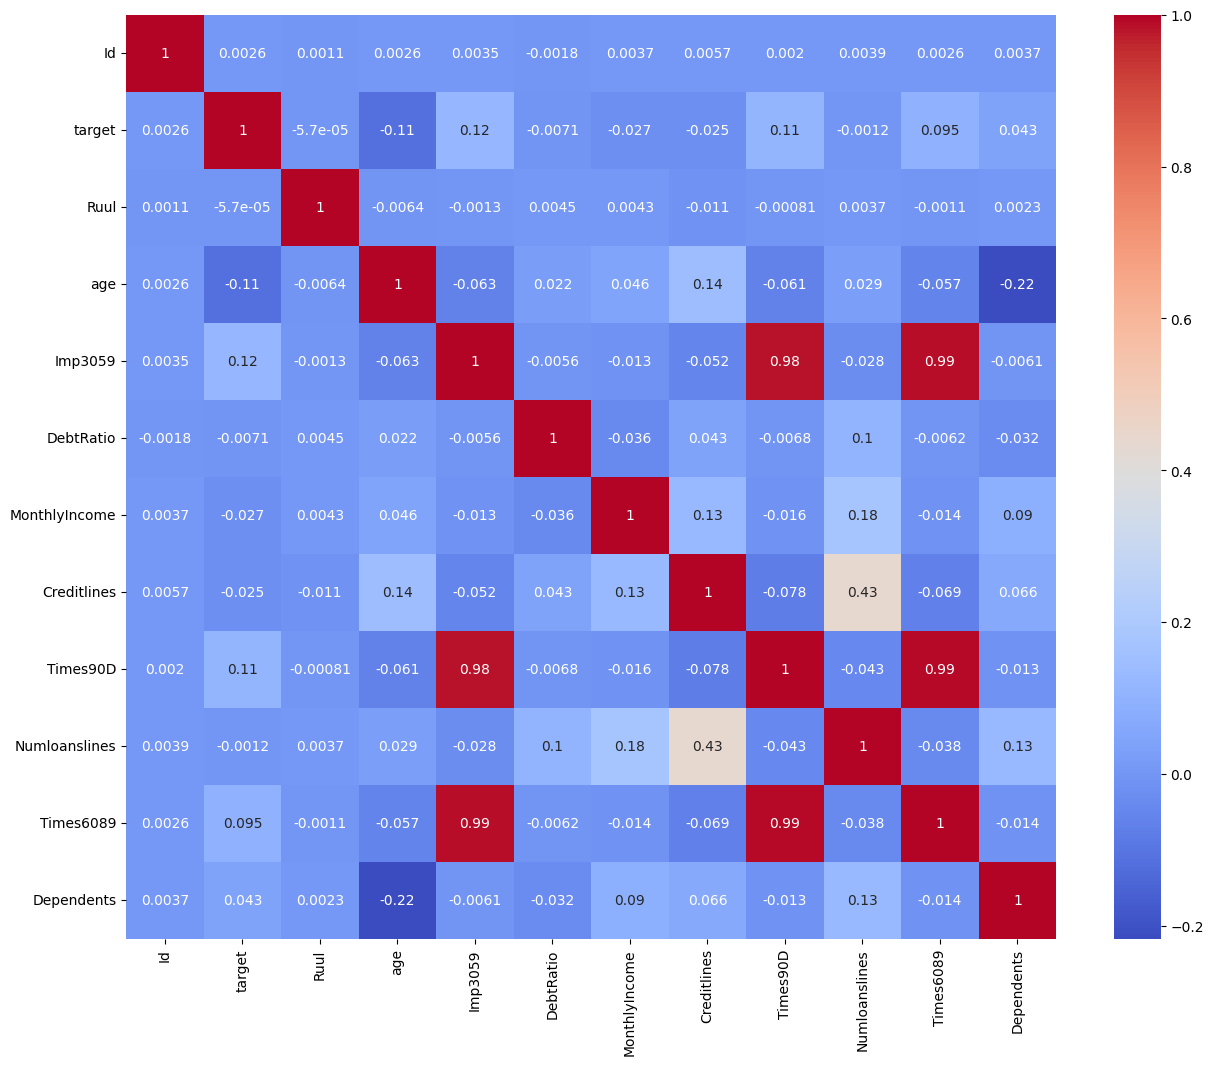

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,12))
sns.heatmap(credit.corr(), annot=True, cmap='coolwarm')

In [42]:
#sns.pairplot(credit);

In [43]:
#columnas extra

#age ver que no haya cifras absurdas, el mínimo parece 0
#el debt ratio debería ser menor que 1
#number of dependents no puede ser float

In [44]:
#age

credit["age"].value_counts()

48     1885
49     1878
63     1857
50     1836
47     1816
       ... 
99        3
102       2
105       1
0         1
101       1
Name: age, Length: 84, dtype: int64

In [45]:
filtered_data = credit[credit['age'] < 5]
filtered_data 


,Id,target,Ruul,age,Imp3059,DebtRatio,MonthlyIncome,Creditlines,Times90D,Numloanslines,Times6089,Dependents
66371,65695,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [46]:
#hay un age 0 con dependents el cual elimino
credit=credit[credit["age"] !=0]
credit

,Id,target,Ruul,age,Imp3059,DebtRatio,MonthlyIncome,Creditlines,Times90D,Numloanslines,Times6089,Dependents
0,44164,0,0.768219,68,1,0.687930,2178.0,12,0,1,0,0.0
1,95356,0,0.289873,52,0,0.385497,3750.0,16,0,1,0,1.0
2,108917,0,0.000000,54,0,0.346503,6833.0,8,0,1,0,0.0
3,99039,0,0.046064,66,1,0.407614,5200.0,6,0,1,0,1.0
4,116168,0,0.168771,45,0,4702.000000,NaN,10,0,3,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
73358,25055,0,0.010468,45,0,0.211663,12500.0,15,0,1,0,3.0
73359,105554,0,0.131250,42,0,0.311538,5000.0,9,0,0,0,0.0
73360,129050,0,0.550527,59,0,2777.000000,NaN,12,0,1,0,0.0
73361,94633,0,0.678651,31,0,0.436990,3800.0,12,0,1,0,0.0


In [47]:
#si el debt ratio es mayor que 1 se trata de gente que tiene más deudas que activos, creo una columna para reflejarlo


credit["endeudado"]=credit["DebtRatio"].apply(lambda x: 1 if x >100 else 0)

credit

C:\Users\IS\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Id,target,Ruul,age,Imp3059,DebtRatio,MonthlyIncome,Creditlines,Times90D,Numloanslines,Times6089,Dependents,endeudado
0,44164,0,0.768219,68,1,0.687930,2178.0,12,0,1,0,0.0,0
1,95356,0,0.289873,52,0,0.385497,3750.0,16,0,1,0,1.0,0
2,108917,0,0.000000,54,0,0.346503,6833.0,8,0,1,0,0.0,0
3,99039,0,0.046064,66,1,0.407614,5200.0,6,0,1,0,1.0,0
4,116168,0,0.168771,45,0,4702.000000,NaN,10,0,3,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73358,25055,0,0.010468,45,0,0.211663,12500.0,15,0,1,0,3.0,0
73359,105554,0,0.131250,42,0,0.311538,5000.0,9,0,0,0,0.0,0
73360,129050,0,0.550527,59,0,2777.000000,NaN,12,0,1,0,0.0,1
73361,94633,0,0.678651,31,0,0.436990,3800.0,12,0,1,0,0.0,0


In [115]:
filtro= credit[credit["target"]==1]
filtro

,Id,target,Ruul,age,Imp3059,DebtRatio,MonthlyIncome,Creditlines,Times90D,Numloanslines,Times6089,Dependents,endeudado


In [48]:
median_income = credit['MonthlyIncome'].median()
print(median_income)


5400.0


In [51]:
median_value = credit['MonthlyIncome'].median()


In [52]:
credit['MonthlyIncome'] = credit['MonthlyIncome'].fillna(median_value)


C:\Users\IS\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
mean_value_dep=credit["Dependents"].mean()
credit["Dependents"]= credit["Dependents"].fillna(mean_value_dep)
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73362 entries, 0 to 73362
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             73362 non-null  int64  
 1   target         73362 non-null  int64  
 2   Ruul           73362 non-null  float64
 3   age            73362 non-null  int32  
 4   Imp3059        73362 non-null  int64  
 5   DebtRatio      73362 non-null  float64
 6   MonthlyIncome  73362 non-null  float64
 7   Creditlines    73362 non-null  int64  
 8   Times90D       73362 non-null  int64  
 9   Numloanslines  73362 non-null  int64  
 10  Times6089      73362 non-null  int64  
 11  Dependents     73362 non-null  float64
 12  endeudado      73362 non-null  int64  
dtypes: float64(4), int32(1), int64(8)
memory usage: 7.6 MB


C:\Users\IS\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Comienzo machine learning

In [63]:
import numpy as np

X = np.array(credit.drop(['target'], 1))
y = np.array(credit['target'])

C:\Users\IS\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [65]:
predictions = model.predict(X)
print(predictions)

[0 0 0 ... 0 0 0]


In [66]:
predicions_proba = model.predict_proba(X)
print(np.round(np.array(predicions_proba), 2))

[[0.96 0.04]
 [0.94 0.06]
 [0.95 0.05]
 ...
 [0.96 0.04]
 [0.86 0.14]
 [0.97 0.03]]


In [67]:
model.score(X, y)

0.9340394209536272

In [68]:
model.classes_

array([0, 1], dtype=int64)

In [69]:
# validacion 
from sklearn import model_selection

validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=validation_size,
                                                                    random_state=seed)

from sklearn.metrics import classification_report

In [71]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy")

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)

c:\Users\IS\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\IS\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lea

[0.93150452 0.92775601 0.92809678 0.93252684 0.94155734 0.94019424
 0.93712728 0.93542341 0.93763844 0.92978868]


In [72]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [73]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.9330062018673755


In [74]:
classification_report(Y_test, predictions)

c:\Users\IS\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\IS\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\IS\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

'              precision    recall  f1-score   support\n\n           0       0.93      1.00      0.97     13690\n           1       0.00      0.00      0.00       983\n\n    accuracy                           0.93     14673\n   macro avg       0.47      0.50      0.48     14673\nweighted avg       0.87      0.93      0.90     14673\n'

In [75]:
pd.Series(Y_train).value_counts()

0    54836
1     3853
dtype: int64

In [77]:
#analisis resultados
c_matrix = confusion_matrix(Y_test, predictions)
print(c_matrix)

[[13690     0]
 [  983     0]]


In [85]:
#Prediccion

credit_pred = pd.read_csv("D:\\Bootcamp\\competencia1\\Competencia2\\tests.csv")
credit_pred.head()

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,15576,0.051782,53y,0,0.009350,2245.0,3,0,0,0,0.0
1,94308,0.022133,57y,0,0.319562,7672.0,26,0,1,0,2.0
2,53983,0.013693,68y,0,0.139237,4064.0,4,0,0,0,1.0
3,61359,0.018568,74y,0,0.018760,10500.0,27,0,0,0,0.0
4,71383,0.008630,66y,0,9.000000,NaN,5,0,0,0,0.0


In [86]:
credit_pred["age"]=credit_pred["age"].str.replace("y","")

In [87]:
credit_pred["age"]=credit_pred["age"].astype(int)


In [88]:
credit_pred = credit_pred.rename(columns={"RevolvingUtilizationOfUnsecuredLines": "Ruul"})
credit_pred=credit_pred.rename(columns={"NumberOfTime30-59DaysPastDueNotWorse":"Imp3059"})
credit_pred=credit_pred.rename(columns={"NumberOfOpencredit_predLinesAndLoans":"Creditlines"})
credit_pred=credit_pred.rename(columns={"NumberOfTimes90DaysLate":"Times90D", "NumberRealEstateLoansOrLines":"Numloanslines", "NumberOfTime60-89DaysPastDueNotWorse":"Times6089","NumberOfDependents":"Dependents"})
credit_pred

,Id,Ruul,age,Imp3059,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,Times90D,Numloanslines,Times6089,Dependents
0,15576,0.051782,53,0,0.009350,2245.0,3,0,0,0,0.0
1,94308,0.022133,57,0,0.319562,7672.0,26,0,1,0,2.0
2,53983,0.013693,68,0,0.139237,4064.0,4,0,0,0,1.0
3,61359,0.018568,74,0,0.018760,10500.0,27,0,0,0,0.0
4,71383,0.008630,66,0,9.000000,NaN,5,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
31437,110527,0.469451,28,0,0.029072,2166.0,1,0,0,0,0.0
31438,121978,0.171910,44,0,0.375557,5833.0,8,0,2,0,4.0
31439,77327,0.004842,51,1,30.000000,0.0,3,0,0,0,2.0
31440,48341,0.636554,42,0,0.483931,7000.0,10,2,1,0,1.0


In [89]:
credit_pred["endeudado"]=credit_pred["DebtRatio"].apply(lambda x: 1 if x >100 else 0)

credit_pred

,Id,Ruul,age,Imp3059,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,Times90D,Numloanslines,Times6089,Dependents,endeudado
0,15576,0.051782,53,0,0.009350,2245.0,3,0,0,0,0.0,0
1,94308,0.022133,57,0,0.319562,7672.0,26,0,1,0,2.0,0
2,53983,0.013693,68,0,0.139237,4064.0,4,0,0,0,1.0,0
3,61359,0.018568,74,0,0.018760,10500.0,27,0,0,0,0.0,0
4,71383,0.008630,66,0,9.000000,NaN,5,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
31437,110527,0.469451,28,0,0.029072,2166.0,1,0,0,0,0.0,0
31438,121978,0.171910,44,0,0.375557,5833.0,8,0,2,0,4.0,0
31439,77327,0.004842,51,1,30.000000,0.0,3,0,0,0,2.0,0
31440,48341,0.636554,42,0,0.483931,7000.0,10,2,1,0,1.0,0


In [92]:
median_value = credit_pred['MonthlyIncome'].median()
credit_pred['MonthlyIncome'] = credit_pred['MonthlyIncome'].fillna(median_value)
mean_value_dep=credit_pred["Dependents"].mean()
credit_pred["Dependents"]= credit_pred["Dependents"].fillna(mean_value_dep)
credit_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31442 entries, 0 to 31441
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Id                               31442 non-null  int64  
 1   Ruul                             31442 non-null  float64
 2   age                              31442 non-null  int32  
 3   Imp3059                          31442 non-null  int64  
 4   DebtRatio                        31442 non-null  float64
 5   MonthlyIncome                    31442 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans  31442 non-null  int64  
 7   Times90D                         31442 non-null  int64  
 8   Numloanslines                    31442 non-null  int64  
 9   Times6089                        31442 non-null  int64  
 10  Dependents                       31442 non-null  float64
 11  endeudado                        31442 non-null  int64  
dtypes: float64(4), int

In [94]:
X_pred= credit_pred



In [101]:
predictions_submit = model.predict(X_pred)
predictions_submit

c:\Users\IS\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [103]:
#subir a kaggle

submission2 = pd.DataFrame({"Id": X_pred['Id'], "target": predictions_submit})

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [106]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.Id.all() == sample.Id.all():
                print("You're ready to submit!")
                submission.to_csv("submission2.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")

In [107]:
chequeator(submission)

You're ready to submit!


NameError: name 'urllib' is not defined